In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from langgraph.types import Command

In [2]:
class State(TypedDict):
    transfer_reason: str

graph_builder = StateGraph(State)

In [3]:
from typing import Literal


def triage_node(state: State) -> Command[Literal["account_support", "tech_support"]]:
    return Command(
        goto="account_support",
        update={
            "transfer_reason": "사용자가 비밀번호 변경을 요청하였습니다"
        },
    )

def tech_support(state: State):
    print(f"[tech_support] 고객님 안녕하세요. 기술지원 부서 입니다.")
    return {}

def account_support(state: State):
    print(f"[account_support] 고객님 안녕하세요. 비밀번호 변경을 도와드리겠습니다.")
    return {}

In [4]:
graph_builder.add_node("triage_node", triage_node)
graph_builder.add_node("tech_support", tech_support)
graph_builder.add_node("account_support", account_support)
    

graph_builder.add_edge(START, "triage_node")
graph_builder.add_edge("tech_support", END)
graph_builder.add_edge("account_support", END)


In [5]:


graph = graph_builder.compile()

# graph.invoke({"words": ["hello", "world", "how", "are", "you", "doing"]})




In [6]:
graph.invoke({})

[account_support] 고객님 안녕하세요. 비밀번호 변경을 도와드리겠습니다.


{'transfer_reason': '사용자가 비밀번호 변경을 요청하였습니다'}

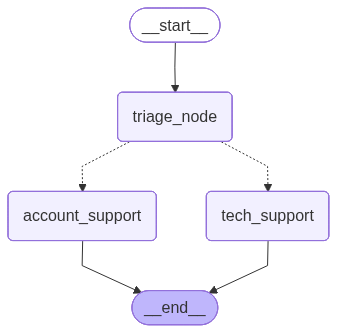

In [7]:
graph